# A *DataScience Software* notebook
****
### Notebook by Ahmed A. HAOUILI, Moumene K. AMROUCHE, Manal KHALLAAYOUNE
#### Supported by [Bertrand HASSANI](https://fr.linkedin.com/in/bertrandkianhassani)
#### [University of Panthéon Sorbonne - Paris 1](http://www.m2irfa.fr/ingeacutenierie-matheacutematique-de-la-finance.html)

## Table of contents
***

1. [Introduction](#Introduction)
2. [Required libraries](#Required-libraries)
3. [The problem domain](#The-problem-domain)
4. [Step 1 : Checking the data](#Step-1:-Checking-the-data)
5. [Step 2 : Tidying the data](#Step-2:-Tidying-the-data)
6. [Step 3 : Exploratory analysis](#Step-3:-Exploratory-analysis) <br>
    6.1. [Step 3.1 : Data Visualisation](#Step-3.1-:-Data-Visualisation) <br>
    6.2. [Step 3.2 : Creates zones from geospacial features with clustering](#Step-3.2-:-Creates-zones-from-geospacial-features-with-clustering)<br>
    6.3. [Step 3.3 : Segmentation of properties by homogeneity with clustering](#Step-3.3-:-Segmentation-of-properties-by-homogeneity-with-clustering) <br>
    6.4. [Step 3.4 : Adding label column for classification](#Step-3.4-:-Adding-label-column-for-classification)
7. [Step 4 : Classification](#Step-4-:-Classification)<br>
    7.1. [First, the champion XGBClassifier](#First,-the-champion-XGBClassifier)<br>
    7.2. [SVM Classifier](#SVM-Classifier)
8. [Conclusion](#Conclusion) <br>
    8.1. [From a Data science point of view](#From-a-Data-science-point-of-view)<br>
    8.2. [From a Business point of view](#From-a-Business-point-of-view)<br>

## Introduction

[[ go back to the top ]](#Table-of-contents)

***

As part of the teaching unit: *Data Science Software*, given to students of the M2 IRFA at the University Paris-1 Panthéon Sorbonne.  We worked in triads on a machine learning project. The main objective of our work is to give a vision of the real estate market in *Paris*. To do that, we based on a dataset of real estate transactions in *Ile de France*.





## Required libraries

[[ go back to the top ]](#Table-of-contents)

***

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **Scikit-learn**: The essential Machine Learning package in Python.
* **xgboost**:
* **Matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Plotly**: Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python.
* **Seaborn**: Advanced statistical plotting library.
* **Folium**: rovides an interactive leaflet map visulation.
* **Geopy**: locate the coordinates of addresses, cities, countries, and landmarks across the globe 

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib plotly seaborn folium geopy
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## The problem domain

[[ go back to the top ]](#Table-of-contents)

***

The real estate market in France is the over-the-counter market for the sale, purchase and rental of real estate. It's can be segmented into a multitude of sub-markets. These sub-markets correspond to geographical locations (regions, departments, cities, ...), types of property (houses, apartments, offices, industrial or commercial premises, land, etc.), or the quality and services of the property in question (old, to be renovated, new, etc.).

#### Some history...

Since 1965, housing prices in France have shown relative stability in relation to household income. It observed that house prices were related to the growth of household incomes and that they oscillated with a 10% margin around a long trend (Friggit tunnel). Prices in France were confined in the tunnel for more than 37 years, until 2002. One exception concerns housing prices in the Paris region, which largely emerged from this tunnel in 1988 to reach a maximum - more than 50% - in 1991.

Real estate speculation by property dealers is often held responsible for this peak. This boom was followed by a violent correction known as the 1991 real estate crash, where prices fell sharply (by 30% to 40% in some areas) until 1997.

Throughout France, house and apartment prices rose slowly at first between 1997 and 2001, then increasingly strongly between 2002 and 2007. During these 10 years, French real estate prices finally multiplied by 2.5 or even 3, i.e. a 150% to 200% increase.

Some observers perceive, as early as 2007, the first signs of a slowdown in the number of transactions, followed by a slight decline in prices. The prices of old real estate finally fell by 3% in 2008 and then by 7% in 2009.

The year 2010 finally generates a strong increase in real estate prices. Approximately +10~15% for major cities, and +20% for Paris intra-muros and old real estate. Real estate prices begin to rise sharply again in 2016.


#### And now ? 

According to the Greater Paris Chamber of Notaries, 42,060 old homes were sold in the Ile-de-France region in the second quarter of 2021, a 20% jump from the second quarter of 2020, which was marked by the halt in transactions when the first containment came into effect.

<img src="Projet_final.jpg">

Every year, notaries draw up statistics on the evolution of real estate in France. Numerous classifications according to the nature as well as the place, the state, etc. are then made. It is thus possible to have public data on the whole market. 

**Do you think machine learning can anticipate future prices? You'll get the answer below.**







## Step 1 : Checking the data

[[ go back to the top ]](#Table-of-contents)

***

The first step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

In this part, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do we need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [203]:
import pandas as pd
pd.options.mode.chained_assignment = None
data = pd.read_csv('idf_dvf.csv', sep =',', low_memory=False)
data.head()

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2313486,2019-966415,2019-01-03,1,Vente,310000.0,11.0,NaN,RUE DE LA FONTAINE,0650,...,Maison,101.0,4.0,S,sols,NaN,NaN,323.0,2.740574,48.739669
1,2313487,2019-966415,2019-01-03,1,Vente,310000.0,NaN,NaN,GRETZ,B018,...,NaN,NaN,NaN,J,jardins,POTAG,Jardin potager,532.0,2.741131,48.739847
2,2313488,2019-966416,2019-01-03,1,Vente,150000.0,1491.0,NaN,AV DE LA GARE,0390,...,Maison,72.0,3.0,AG,terrains d'agrément,PARC,Parc,1407.0,2.539824,48.563586
3,2313489,2019-966416,2019-01-03,1,Vente,150000.0,1491.0,NaN,AV DE LA GARE,0390,...,Maison,72.0,3.0,S,sols,NaN,NaN,86.0,2.539824,48.563586
4,2313490,2019-966417,2019-01-09,1,Vente,250000.0,14.0,NaN,RUE ST AMBROISE,1510,...,Local industriel. commercial ou assimilé,44.0,0.0,NaN,NaN,NaN,NaN,NaN,2.656724,48.534489


We've downloaded a data set from the official french [data.gouv.fr](#https://files.data.gouv.fr/) website. Specifically, we downloaded the data from this [link](#https://files.data.gouv.fr/geo-dvf/latest/csv/).

The dataset has a size of **454.2 MB** for **2311621 rows** and **41 columns**. 

Below is a list of the different columns contained in the dataset. As you can see the dataset contains information about real estate transactions. Each row represents an entry for a transcation.

In [204]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311621 entries, 0 to 2311620
Data columns (total 41 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   id_mutation                   object 
 2   date_mutation                 object 
 3   numero_disposition            int64  
 4   nature_mutation               object 
 5   valeur_fonciere               float64
 6   adresse_numero                float64
 7   adresse_suffixe               object 
 8   adresse_nom_voie              object 
 9   adresse_code_voie             object 
 10  code_postal                   float64
 11  code_commune                  int64  
 12  nom_commune                   object 
 13  code_departement              int64  
 14  ancien_code_commune           float64
 15  ancien_nom_commune            object 
 16  id_parcelle                   object 
 17  ancien_id_parcelle            object 
 18  numero_volume         

The first thing we should look is the missing data. 

Below it is easy to see that a large majority of our data is missing.  In the next part, we will try to find a solution for the missing values when necessary. 

In [205]:
data.isna().sum()

Unnamed: 0                            0
id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   18264
adresse_numero                   342341
adresse_suffixe                 2178896
adresse_nom_voie                  49997
adresse_code_voie                 49175
code_postal                       50005
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             2277253
ancien_nom_commune              2277253
id_parcelle                           0
ancien_id_parcelle              2310621
numero_volume                   2298700
lot1_numero                      830588
lot1_surface_carrez             1857967
lot2_numero                     1938446
lot2_surface_carrez             2199545
lot3_numero                     2258971
lot3_surface_carrez             2301865


We enriched the data from the website [Meilleurs_agents.com](#https://www.meilleursagents.com/). The added data are the price ranges in each district of the city. This helped us to detect outliers and replace the values by the average price per square meter, imported from the same source.

These informations will help us to deal with outliers. 

In [206]:
# data from Meilleurs agents 
prix_appart_m2_min = [6000,6000,7000, 8000, 7000, 8000, 8000, 6000, 6000, 5000, 6000, 5000, 4000, 6000, 6000, 6000, 5000,5000, 4000, 5000]
prix_appart_m2_max = [26000,21000,23000,24000, 23000,27000, 26000,24000, 18000, 18000, 17000, 16000, 16000,15000, 20000, 18000,18000, 18000, 15000, 15000]
prix_appart_m2_mean = [13000.5,12000.5, 13000,14000,13000,15000,15000,12000, 12000, 11000, 11000, 10000, 10000, 11000, 12000, 11000.5,11000.5, 10000.5, 9000,10000]

## Step 2 : Tidying the data

[[ go back to the top ]](#Table-of-contents)
***

Now that we've identified several errors in the data set, we need to fix them before we proceed the analysis. Let's walk through the issues one-by-one. 


First, **dealing with the irrelevent information**. We create a Dataframe with only the relevent columns. Because of missing values and the irrelevence of the information, we removed from the dataset the columns below : 
    *  numero_disposition 
    *  adresse_suffixe
    *  ancien_code_commune 
    *  ancien_nom_commune
    *  id_parcelle
    *  ancien_id_parcelle
    *  numero_volume
    *  lot1_numero
    *  lot1_surface_carrez
    *  lot2_numero
    *  lot2_surface_carrez
    *  lot3_numero
    *  lot3_surface_carrez
    *  lot4_numero
    *  lot4_surface_carrez
    *  lot5_numero
    *  lot5_surface_carrez
    *  type_local
    *  code_nature_culture
    *  nature_culture
    *  code_nature_culture_speciale 
    *  nature_culture_speciale
    *  surface_terrain

In [207]:
df = data.loc[:,['Unnamed: 0','id_mutation','date_mutation','nature_mutation','valeur_fonciere','adresse_numero','adresse_nom_voie','adresse_code_voie','code_postal','code_commune','nom_commune','code_departement','nombre_lots','code_type_local','surface_reelle_bati','type_local','nombre_pieces_principales','longitude','latitude']]
df.head()

,Unnamed: 0,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,nombre_lots,code_type_local,surface_reelle_bati,type_local,nombre_pieces_principales,longitude,latitude
0,2313486,2019-966415,2019-01-03,Vente,310000.0,11.0,RUE DE LA FONTAINE,0650,77220.0,77215,Gretz-Armainvilliers,77,0,1.0,101.0,Maison,4.0,2.740574,48.739669
1,2313487,2019-966415,2019-01-03,Vente,310000.0,NaN,GRETZ,B018,77220.0,77215,Gretz-Armainvilliers,77,0,NaN,NaN,NaN,NaN,2.741131,48.739847
2,2313488,2019-966416,2019-01-03,Vente,150000.0,1491.0,AV DE LA GARE,0390,77310.0,77407,Saint-Fargeau-Ponthierry,77,0,1.0,72.0,Maison,3.0,2.539824,48.563586
3,2313489,2019-966416,2019-01-03,Vente,150000.0,1491.0,AV DE LA GARE,0390,77310.0,77407,Saint-Fargeau-Ponthierry,77,0,1.0,72.0,Maison,3.0,2.539824,48.563586
4,2313490,2019-966417,2019-01-09,Vente,250000.0,14.0,RUE ST AMBROISE,1510,77000.0,77288,Melun,77,2,4.0,44.0,Local industriel. commercial ou assimilé,0.0,2.656724,48.534489


We notice the presence of a column named *Unnamed:0*, which should be the **Id** of each row in our dataframe (the index of the dataframe). Let's correct this.

In [208]:
# Rename the first column
df.rename(columns = {'Unnamed: 0' : 'id'}, inplace = True)
df['id'] = df.index
df.head()

,id,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,nombre_lots,code_type_local,surface_reelle_bati,type_local,nombre_pieces_principales,longitude,latitude
0,0,2019-966415,2019-01-03,Vente,310000.0,11.0,RUE DE LA FONTAINE,0650,77220.0,77215,Gretz-Armainvilliers,77,0,1.0,101.0,Maison,4.0,2.740574,48.739669
1,1,2019-966415,2019-01-03,Vente,310000.0,NaN,GRETZ,B018,77220.0,77215,Gretz-Armainvilliers,77,0,NaN,NaN,NaN,NaN,2.741131,48.739847
2,2,2019-966416,2019-01-03,Vente,150000.0,1491.0,AV DE LA GARE,0390,77310.0,77407,Saint-Fargeau-Ponthierry,77,0,1.0,72.0,Maison,3.0,2.539824,48.563586
3,3,2019-966416,2019-01-03,Vente,150000.0,1491.0,AV DE LA GARE,0390,77310.0,77407,Saint-Fargeau-Ponthierry,77,0,1.0,72.0,Maison,3.0,2.539824,48.563586
4,4,2019-966417,2019-01-09,Vente,250000.0,14.0,RUE ST AMBROISE,1510,77000.0,77288,Melun,77,2,4.0,44.0,Local industriel. commercial ou assimilé,0.0,2.656724,48.534489


At this stage, we still have missings values in our dataset. On the 19 remaining columns, there are rows without data.

In [209]:
df.isna().sum()

id                                 0
id_mutation                        0
date_mutation                      0
nature_mutation                    0
valeur_fonciere                18264
adresse_numero                342341
adresse_nom_voie               49997
adresse_code_voie              49175
code_postal                    50005
code_commune                       0
nom_commune                        0
code_departement                   0
nombre_lots                        0
code_type_local               510694
surface_reelle_bati          1071895
type_local                    510694
nombre_pieces_principales     511928
longitude                      50853
latitude                       50853
dtype: int64

We drop all rows that contains at least one missing value, and we drop duplicate values. 

In [210]:
df.dropna(subset=['surface_reelle_bati','valeur_fonciere','longitude','latitude','adresse_nom_voie','adresse_code_voie','code_postal'],inplace=True)
df = df.iloc[:,1:].drop_duplicates()

To better identify the information of a transaction, and deal with outliers : 
- we separate the **mutation_year** column into 3 parts: Day, Month, Year.
- we create a new feature named **p/m2**, it's property value divided by the surface area of the property.
- We, also create a feature **arrondissement** by using the columns **code_commune**.

In [211]:
# Create new features from date
df['mutation_year'] = df['date_mutation'].map(lambda x: x[0:4])
df['mutation_month'] = df['date_mutation'].map(lambda x: x[5:7])
df['mutation_day'] = df['date_mutation'].map(lambda x: x[8:10])

# Create new feature from value of the transcation
df['p/m2'] = df['valeur_fonciere']/df['surface_reelle_bati']

# Create new feature to distrit
df['arrondissement'] = df['code_commune'].map(lambda x : str(x)[3:5])

- We select only data from Paris real estate transaction. 

In [212]:
# select data from Paris
df = df[df['code_departement']==75]

Finally, we **drop outliers**

In [213]:
# Drop Outliers & Nan values
df.drop(df[df['type_local']=="Dépendance"].index, inplace =True) 
df = df.dropna()

At this stage, our dataset does not contain any missing values.

We will add information from **Meilleurs_agents.com** to our data set. using the column **p2/m2**, we check if the price per square meter given by the division of property value by the surface area of the property is between the minimum and the maximum price per district. 

- If it is, we leave the value as it is. This value represents the problem under study.

- If it is not the case, it is an outlier. This value is replaced by the average of the prices per district. 

In [214]:
import numpy as np

In [215]:
arr = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
for i in range(len(arr)):
    df['p/m2'][(df['arrondissement']==arr[i])&((df['p/m2']<prix_appart_m2_min[i])|(df['p/m2']>prix_appart_m2_max[i]))] = np.nan
    df.fillna(prix_appart_m2_mean[i], inplace=True)

We create a key to better identify our sets over the year : *cle* = *latitude_longitude_codeTypeLocal_p/m2_NombrePiecesPrincipales_dataMutation*

Si on vend en 2017, en 2018, 2019, ... on doit savoir que c'est le même bien.


In [216]:
# Create new feature Key
df['id']= df.index
df['cle'] = df['latitude'].astype(str)+"_"+df['longitude'].astype(str)+"_"+df['code_type_local'].astype(str)+"_"+df['p/m2'].astype(str)+"_"+df['nombre_pieces_principales'].astype(str)+"_"+df['date_mutation'].astype(str)

We check if there is duplicated information, and drop it

In [217]:
df['cle'].duplicated().sum() #= 511
df = df.drop_duplicates(subset = 'cle')

**At the end of this step, we have a date set of (219146 rows, 25 columns), containing information about real estate transaction in Paris. It has no null values and no outliers.**

Indeed, the file contains a large number of null values. Removing these rows reduced the size of the dataset considerably.

In [218]:
df.shape

(219146, 25)

## Step 3 : Exploratory analysis

[[ go back to the top ]](#Table-of-contents)
***


This phase is the most important of the project and the one that requires the most work. It was important to understand the variables in order to select the ones that would be relevant for the different parts of the project.

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

   * How is my data distributed ?
   * Are there any correlations in my data ?
   * Are there any confounding factors that explain these correlations ?

This is the stage where we plot all the data in as many ways as possible.

### Step 3.1 : Data Visualisation

[[ go back to the top ]](#Table-of-contents)


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

We will represent a set of graphs of the distributions of quantitative and qualitative variables. 

[Text(0, 0.5, 'mutation count')]

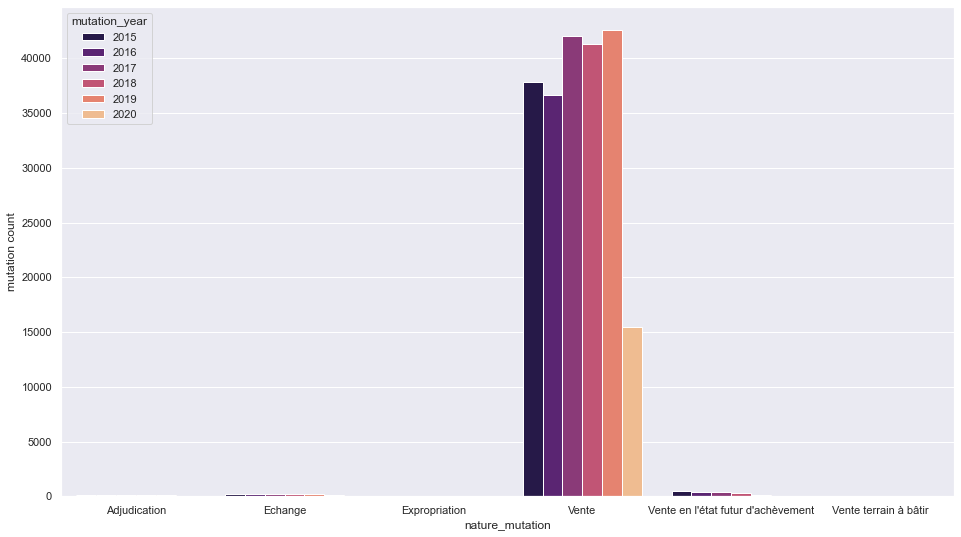

In [220]:
l = df.loc[:,['mutation_year','nature_mutation','id']].groupby(['mutation_year','nature_mutation']).count()
l.reset_index(inplace=True)

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(16, 9)}) 
ax = sns.barplot(x="nature_mutation", y="id" ,hue="mutation_year",data=l,palette="magma")
ax.set(ylabel='mutation count')

In [221]:
df['nature_mutation'].value_counts()

Vente                                 215864
Vente en l'état futur d'achèvement      1571
Echange                                 1076
Adjudication                             603
Vente terrain à bâtir                     18
Expropriation                             14
Name: nature_mutation, dtype: int64

[Text(0, 0.5, 'mutation count')]

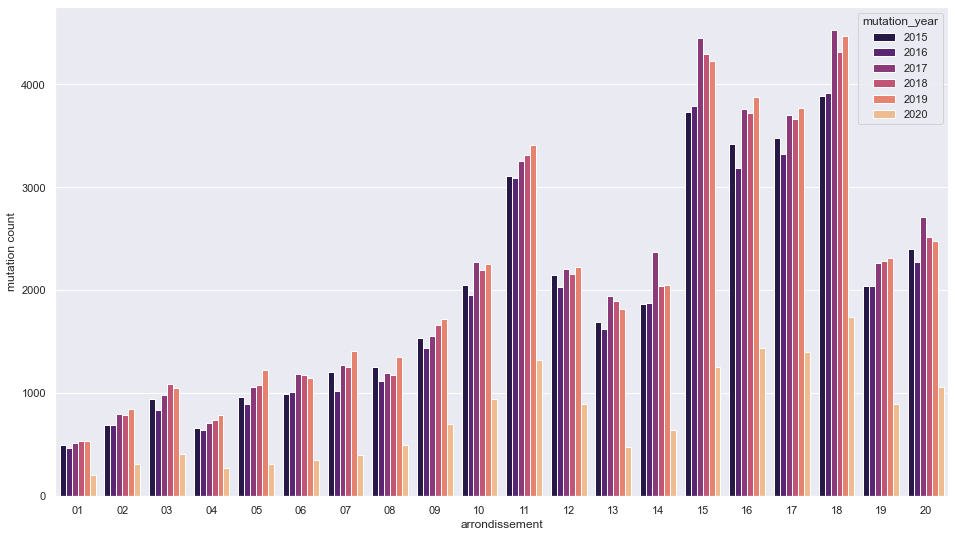

In [222]:
#l = pd.DataFrame(df['nature_mutation'].value_counts())
l = df.loc[:,['mutation_year','arrondissement','id']].groupby(['mutation_year','arrondissement']).count()
l.reset_index(inplace=True)

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(16, 9)}) 
ax = sns.barplot(x="arrondissement", y="id" ,hue="mutation_year",data=l,palette="magma")
ax.set(ylabel='mutation count')

[Text(0, 0.5, 'mutation count')]

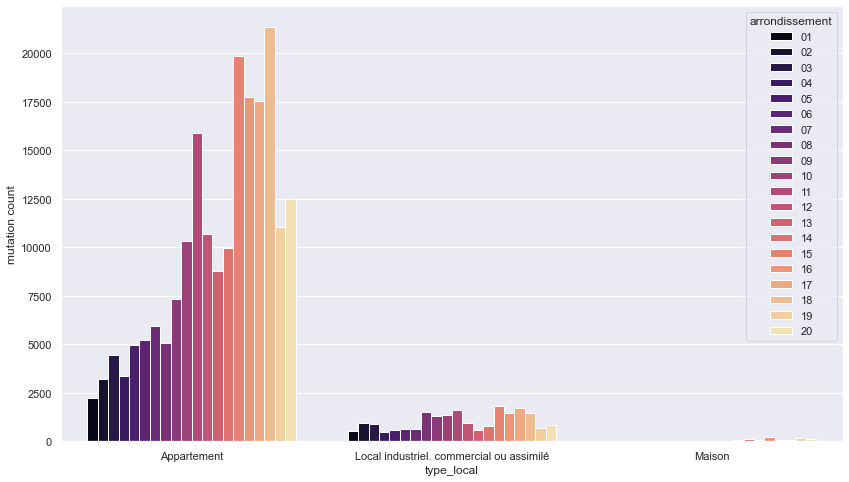

In [223]:
#l = pd.DataFrame(df['nature_mutation'].value_counts())
l = df.loc[:,['type_local','arrondissement','id']].groupby(['arrondissement','type_local']).count()
l.reset_index(inplace=True)

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(14, 8)}) 
ax = sns.barplot(x="type_local", y="id" ,hue="arrondissement",data=l,palette="magma")
ax.set(ylabel='mutation count')

[Text(0, 0.5, 'mutation count')]

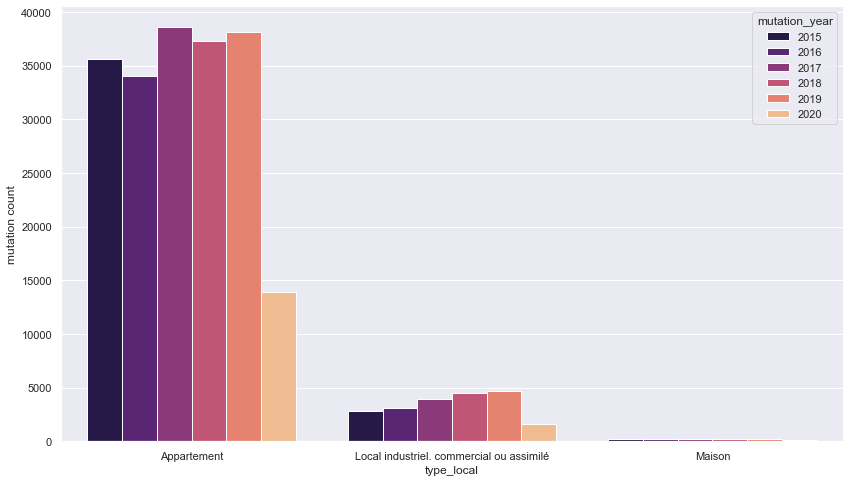

In [224]:
#l = pd.DataFrame(df['nature_mutation'].value_counts())
l = df.loc[:,['type_local','mutation_year','id']].groupby(['mutation_year','type_local']).count()
l.reset_index(inplace=True)

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(14, 8)}) 
ax = sns.barplot(x="type_local", y="id" ,hue="mutation_year",data=l,palette="magma")
ax.set(ylabel='mutation count')

In [225]:
#Paris
l = df.loc[:,['type_local','p/m2','mutation_year','arrondissement']].groupby(['mutation_year','type_local','arrondissement']).mean()
l.reset_index(inplace=True)

Text(0.5, 1.0, '2ème arrondissement')

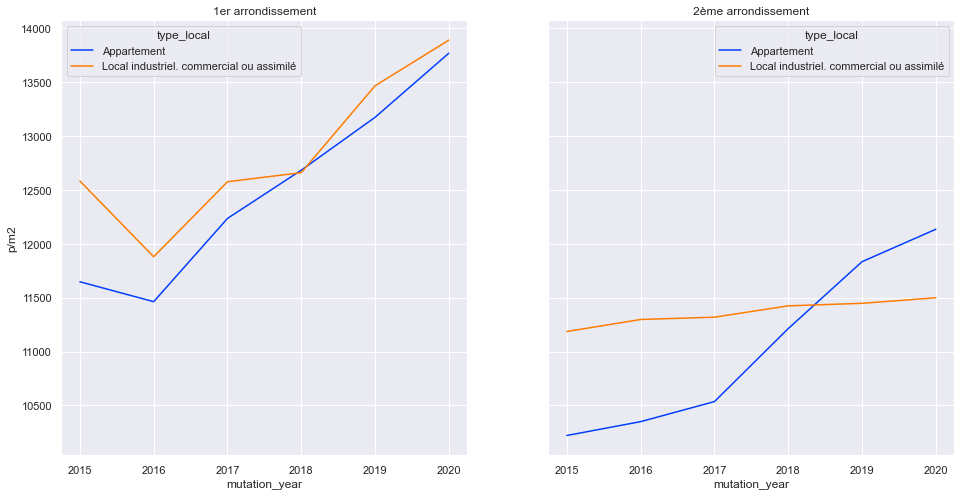

In [226]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='01'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("1er arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='02'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("2ème arrondissement")

Text(0.5, 1.0, '4ème arrondissement')

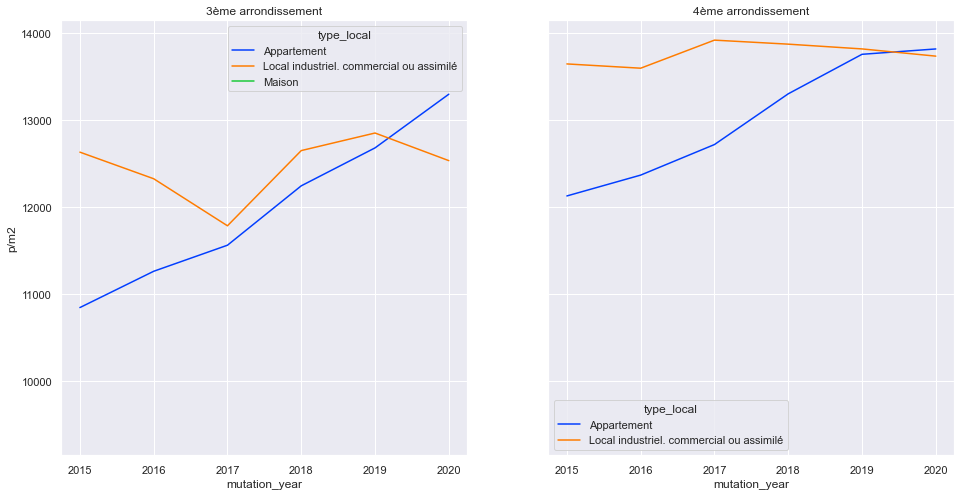

In [227]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='03'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("3ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='04'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("4ème arrondissement")

Text(0.5, 1.0, '6ème arrondissement')

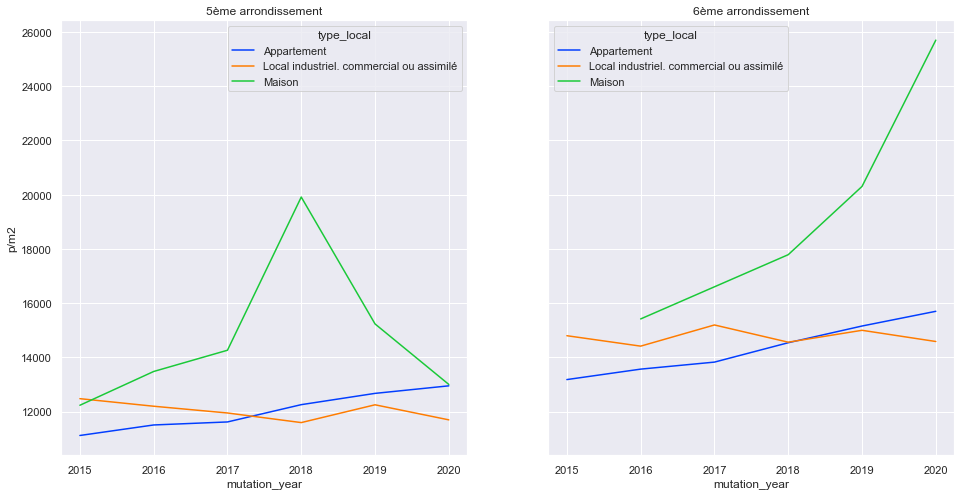

In [228]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='05'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("5ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='06'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("6ème arrondissement")

Text(0.5, 1.0, '8ème arrondissement')

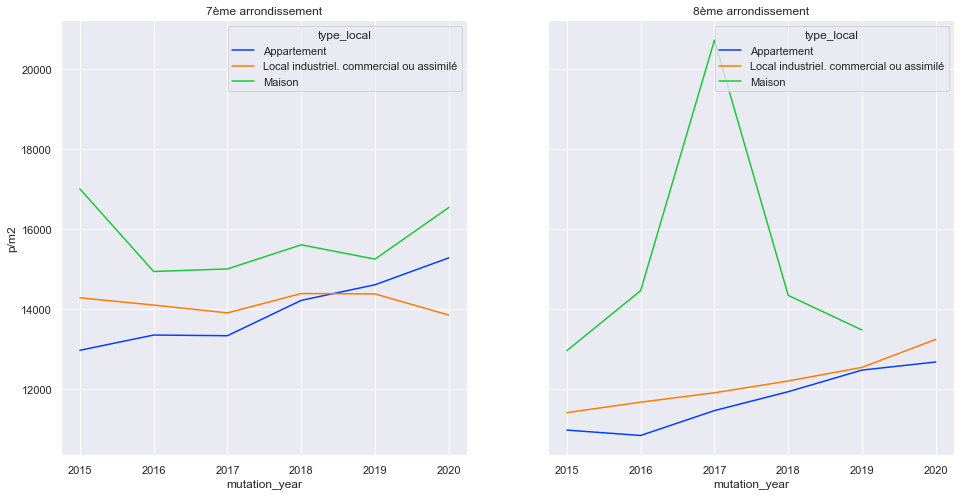

In [229]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='07'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("7ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='08'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("8ème arrondissement")

Text(0.5, 1.0, '10ème arrondissement')

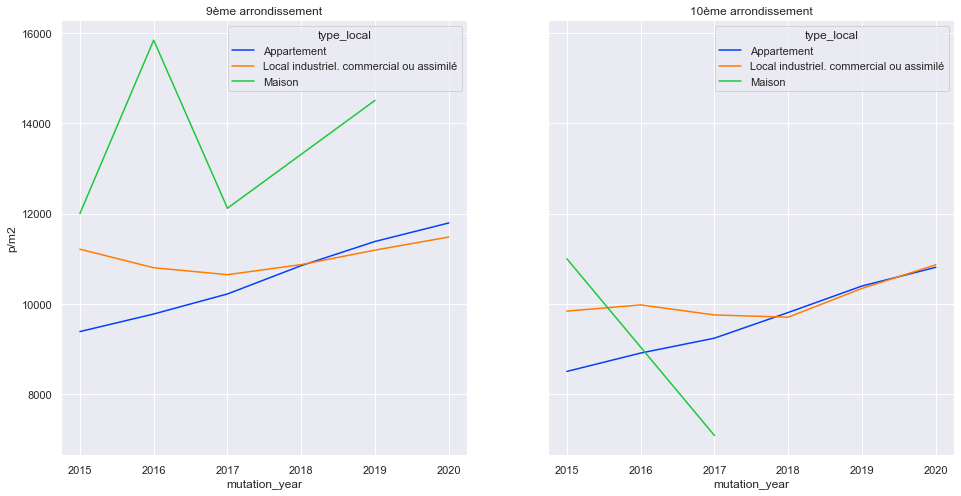

In [230]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='09'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("9ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='10'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("10ème arrondissement")

Text(0.5, 1.0, '12ème arrondissement')

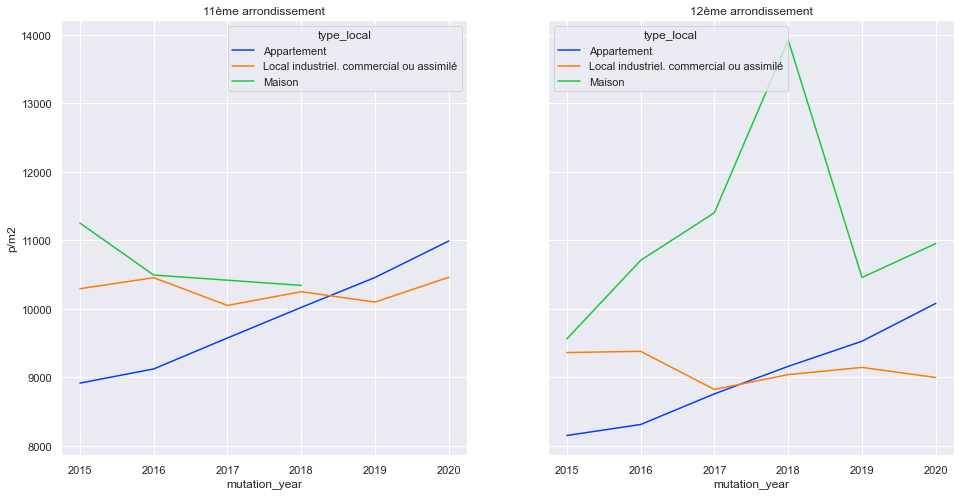

In [231]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='11'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("11ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='12'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("12ème arrondissement")

Text(0.5, 1.0, '14ème arrondissement')

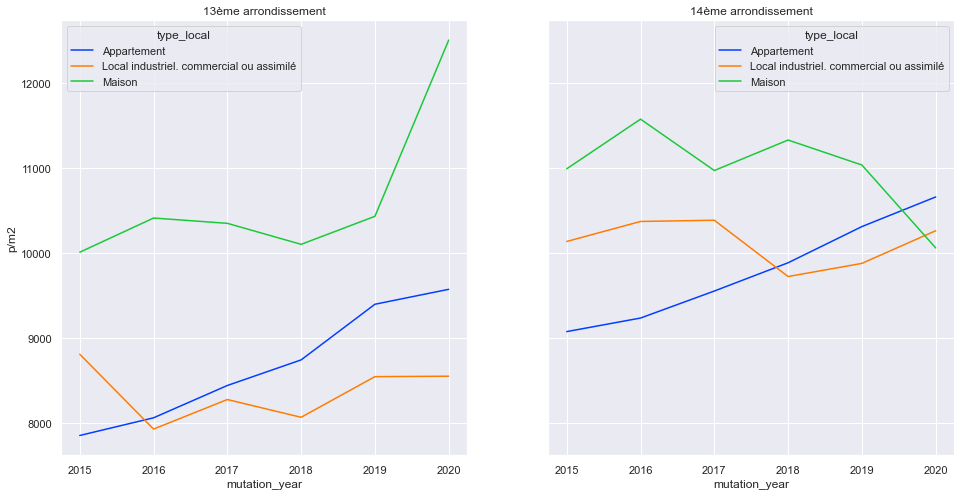

In [232]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='13'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("13ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='14'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("14ème arrondissement")

Text(0.5, 1.0, '16ème arrondissement')

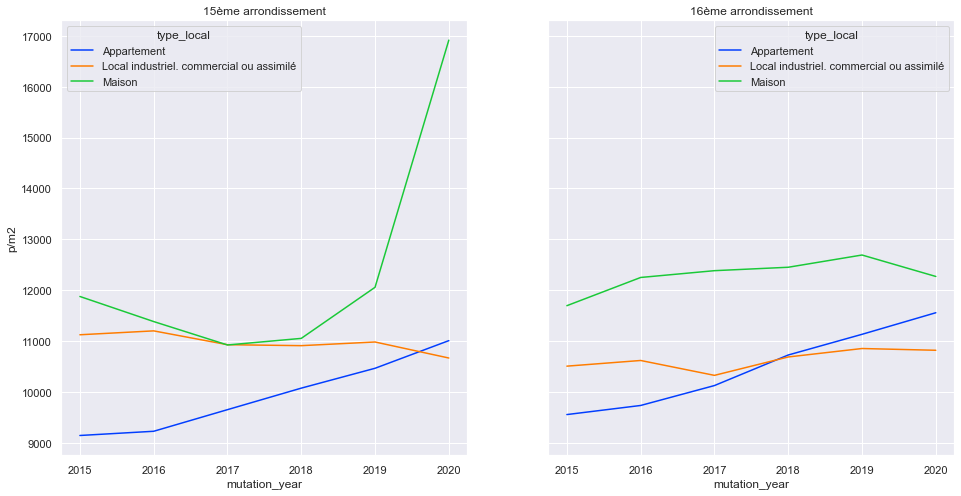

In [233]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='15'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("15ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='16'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("16ème arrondissement")

Text(0.5, 1.0, '18ème arrondissement')

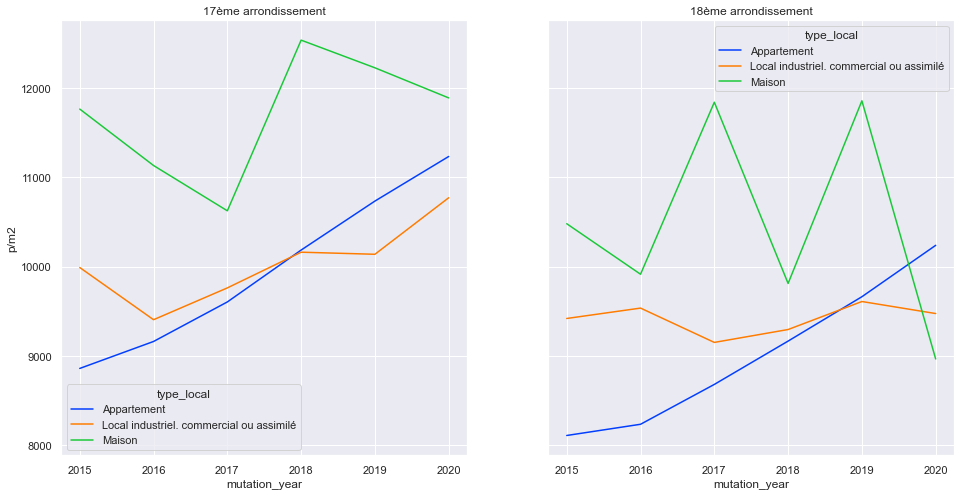

In [234]:
fig, axes = plt.subplots(1,2, figsize=(16, 8), sharey=True)
sns.lineplot(ax=axes[0], data = l[l['arrondissement']=='17'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[0].set_title("17ème arrondissement")
sns.lineplot(ax=axes[1], data = l[l['arrondissement']=='18'], x ='mutation_year', y ='p/m2',hue='type_local',palette="bright")
axes[1].set_title("18ème arrondissement")

### Step 3.2 : Creates zones from geospacial features with clustering

[[ go back to the top ]](#Table-of-contents)


We also, created new variables using existing ones, the *area* variable in particular using *latitude *and *Longitude*. The variable obtained distributes the real estate on twelve zones in Paris.

In [235]:
import geopy

Geopy GeoCoders Nominatim indexes named (or numbered) features within the OpenStreetMap (OSM) dataset and a subset of other unnamed features (pubs, hotels, churches, etc).

In this representation below, we only keep the Paris's *latitude* and *longitude*. 

In [236]:
city = "Paris"

## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)

## keep latitude and longitude only
location = [location.latitude, location.longitude]
print('Paris : ', location)

Paris :  [48.8588897, 2.3200410217200766]


We create a **data cluster** with few features, we will use-it to create a new feature named *Area* with clustering.

In [237]:
data_clus = df[['type_local','nombre_pieces_principales','longitude','latitude','p/m2']]
data_clus.head()

,type_local,nombre_pieces_principales,longitude,latitude,p/m2
413147,Appartement,3.0,2.325288,48.868416,10678.571429
413149,Appartement,3.0,2.363076,48.860305,15100.865385
413151,Appartement,1.0,2.353479,48.864674,13000.000000
413152,Appartement,1.0,2.354961,48.868615,8846.153846
413154,Appartement,3.0,2.314393,48.880118,11946.875000


#### Clustering With K-means++

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. 

1. Arbitrarily choose an initial k centers $C = {c_1, c_2, ... , c_k}$.
2. For each $i ∈ {1, . . . , k}$, set the cluster $C_i$ to be the set of points in X that are closer to $c_i$
than they are to $c_j$ for all $j \neq i$.
3. For each $i ∈ {1, . . . , k}$, set $c_i$ to be the center of mass of all points in $C_i: c_i$ = $\frac{1}
{|Ci|} ∑_{x ∈ C_i} x$.
4. Repeat Steps 2 and 3 until $C$ no longer changes.


**K-means** starts with allocating cluster centers randomly and then looks for "better" solutions. **K-means++** starts with allocation one cluster center randomly and then searches for other centers given the first one.


In particular, let $D(x)$ denote the shortest distance from a data point to the closest center we have already chosen. Then,we define the following algorithm, which we call k-means++.

* 1a. Take one center $c_1$, chosen uniformly at random from $X$ .
* 1b. Take a new center ci, choosing $x ∈ X$ with probability $\frac{D(x)^2}{∑_{x∈X} D(x)^2}$ .
* 1c. Repeat Step 1b. until we have taken $k$ centers altogether.
* 2-4. Proceed as with the standard k-means algorithm.

In [238]:
X = data_clus[["latitude","longitude"]]

X is a dataster containing only *Latitude* and *longitude* information.

In [239]:
from sklearn import preprocessing, cluster

To find the optimal $k$, we use the Elbow Method, which means : *Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.*

In [240]:
max_k = 15

## iterations
distortions = []
for i in range(1, max_k+1):
    if len(X) >= i:
        model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        distortions.append(model.inertia_)

## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

Plotting the distortions, to choose the best $k$.

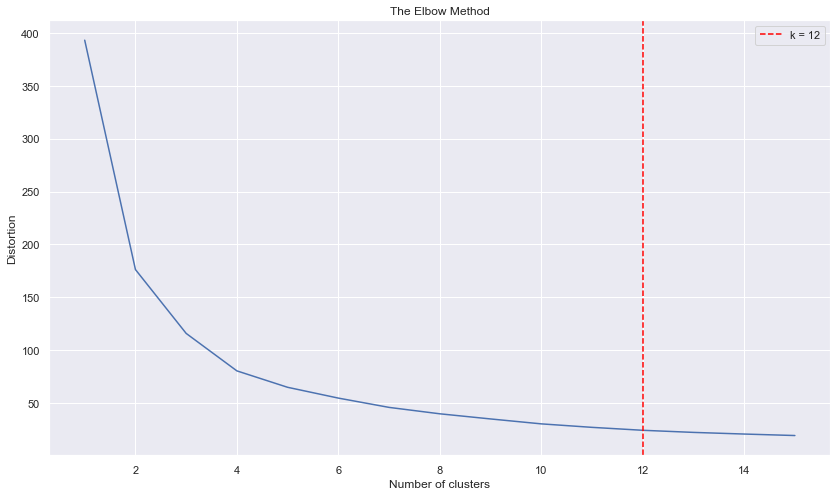

In [241]:
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

We find that the optimal $k$ is equal to 12. We fit our model with n_clusters = 12.

In [242]:
model = cluster.KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=0)
model.fit(X)

KMeans(n_clusters=12, random_state=0)

In [243]:
model.labels_

array([ 0, 11,  6, ...,  6,  6,  6], dtype=int32)

We add to our **data cluster** defined above a column named *Zone*. Each row will be considered as belonging to a *Zone* from 0 to 11. 

In [244]:
data_clus['zone'] = model.labels_
data_clus.head()

,type_local,nombre_pieces_principales,longitude,latitude,p/m2,zone
413147,Appartement,3.0,2.325288,48.868416,10678.571429,0
413149,Appartement,3.0,2.363076,48.860305,15100.865385,11
413151,Appartement,1.0,2.353479,48.864674,13000.000000,6
413152,Appartement,1.0,2.354961,48.868615,8846.153846,6
413154,Appartement,3.0,2.314393,48.880118,11946.875000,0


To better visualise the zones, we create a dataset based on the old data cluster by grouping the data by Zone and taking the average for each zone. 

We use **folium** to create an interative map. 

In [245]:
import folium

In [246]:
data_clus2 = data_clus.groupby('zone').mean()[['p/m2','latitude','longitude']]
data_clus2['zone'] = data_clus2.index

In [247]:
dmap = data_clus2
x, y = "latitude", "longitude"
size = "p/m2"
popup = "p/m2"

scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
dmap[size] = scaler.fit_transform(
               dmap[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
dmap.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           fill=True,
           radius=row[size]).add_to(map_), axis=1)

## plot the map
map_

### Step 3.3 : Segmentation of properties by homogeneity with clustering

[[ go back to the top ]](#Table-of-contents)

***

The objective of this second clustering is to segment the goods. That is, to identify the most homogeneous properties.

- We create a dataframe nammed *data_clus3* with rows from the *data_clus* dataset, using only *type_local*, *p/m2*, *zone* columns. 

- We convert the descriptive variables to numerical variables ones using the pandas *get_dummies()* function. 

- After this, we make a standardisation to *p/m2* the with **sickitlearn MinMaxScaler**.

- Finally, we get a dataframe nammed *X*, we will use-it to make clustering on homegeneous propreties. 

The features are the type of the proprety, the area and the price per square meter.


In [248]:
data_clus3 = data_clus[['type_local','p/m2','zone']].copy() # les biens les plus homogènes 
data_clus3 = pd.get_dummies(data_clus3, columns=['type_local','zone']) # One hot encoders, donnée catégorien en numérique 

# compute required values
scaler = preprocessing.MinMaxScaler() # donnée avec standarisation, remplace p/m2 dans le data set
s = scaler.fit_transform(data_clus3['p/m2'].values.reshape(-1,1))


data_clus3 = data_clus3.assign(pm2=s)
data_clus3.drop(columns={"p/m2"},inplace=True)
X = data_clus3

We get this dataframe : 

In [249]:
X.head()

,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,type_local_Maison,zone_0,zone_1,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,zone_9,zone_10,zone_11,pm2
413147,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.290373
413149,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.482646
413151,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.391304
413152,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.210702
413154,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.345516


We use the same clustering technique as in the Step 3.2 :

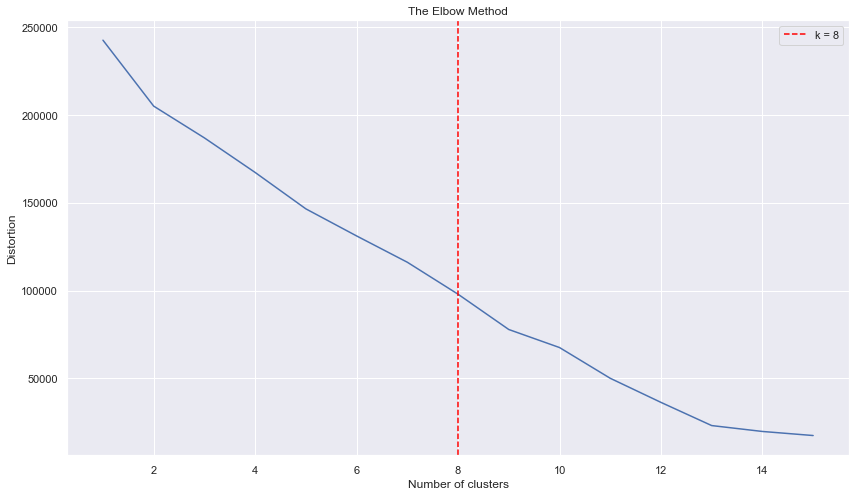

In [250]:
max_k = 15
## iterations
distortions = []
for i in range(1, max_k+1):
    if len(X) >= i:
        model2 = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        model2.fit(X)
        distortions.append(model2.inertia_)
        
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

We find that the optimal $k$ is equal to 8. We fit our model with n_clusters = 8 or more.

In [251]:
model2 = cluster.KMeans(n_clusters=14, init='k-means++', max_iter=300, n_init=10, random_state=0)
model2.fit(X)

KMeans(n_clusters=14, random_state=0)

We add the homogeneity labels to the dataframe

In [252]:
data_clus3['cluster'] = model2.labels_
df['cluster'] = model2.labels_

### Step 3.4 : Adding label column for classification

[[ go back to the top ]](#Table-of-contents)

***

The objective of this step is to add a column named **augmentation** to our dataframe. This column will represent the label of our rows. As mentioned in the introduction, the purpose of classification is to predict whether a good will increase or not. 

to do that, we proceed as follows :

1. First, we select from the dataframe only the interessting features : *latitude*, *longitude*, *code_type_local*, *nombre_pieces_principales*, *cle*, *mutation_year*, *p/m2*.
2. We add the area - found in step 3.2 - information to the dataset.
3. We add a feature nammed *cle* to indentify the same proprety. Each row of our dataset is a transaction, so the same proprety can be referenced multiple times. Imagine a local in Paris, the local can be bought ou selled multiple time. So the column : *cle*, will identify a proprety.

In [253]:
df = df[['latitude','longitude','code_type_local','nombre_pieces_principales','cle','mutation_year','p/m2']]
df['zone'] = data_clus.zone
df['cle'] = df['latitude'].astype(str)+"_"+df['longitude'].astype(str)+"_"+df['code_type_local'].astype(str)+"_"+"_"+df['nombre_pieces_principales'].astype(str)

4. Once we created the *cle* column, we drop the *latitude*, *longitude* columns.

In [254]:
df.drop(columns={"latitude","longitude"},inplace=True)

The dataset look like this : 

In [255]:
df.head()

,code_type_local,nombre_pieces_principales,cle,mutation_year,p/m2,zone
413147,2.0,3.0,48.868416_2.325288_2.0__3.0,2019,10678.571429,0
413149,2.0,3.0,48.860305_2.363076_2.0__3.0,2019,15100.865385,11
413151,2.0,1.0,48.864674_2.353479_2.0__1.0,2019,13000.000000,6
413152,2.0,1.0,48.868615_2.354961_2.0__1.0,2019,8846.153846,6
413154,2.0,3.0,48.880118_2.314393_2.0__3.0,2019,11946.875000,0


5. We split the dataframe by years. We get 6 smaller dataframe from 2015 to 2020.

In [256]:
# Split by year
df15 = df[df['mutation_year']=="2015"]
df16 = df[df['mutation_year']=="2016"]
df17 = df[df['mutation_year']=="2017"]
df18 = df[df['mutation_year']=="2018"]
df19 = df[df['mutation_year']=="2019"]
df20 = df[df['mutation_year']=="2020"]

6. We are looking to find properties that have been involved in a transaction two years in a row.  <br>
The main focus is on the years 2019 and 2020.  <br>
The keys are intersected between the two dataframes representing 2019 and 2020. <br>
We only look to the propreties which are referenced with a transaction in 2019 and in 2020.

In [257]:
#key selection 
key_2019 = df19["cle"].unique() 
key_2020 = df20["cle"].unique()

# Intersection
common_keys_19_20 = np.intersect1d(key_2019,key_2020) # deux transactions sur deux années consicutives, delta du prix.

# store data présent in the intersection
data_2019 = df19[df19["cle"].isin(common_keys_19_20)] # même bien en 2019 et 2019? avec deux prix différents
data_2020 = df20[df20["cle"].isin(common_keys_19_20)] #  

7. After that, we group the propreties by the *cle* attribut, to merge between 2019 and 2019.

In [258]:
data_2020 = data_2020.groupby('cle').mean().reset_index()
data_2019 = data_2019.groupby('cle').mean().reset_index()
data_classification  = data_2020.merge(data_2019, on=['cle','zone','nombre_pieces_principales','code_type_local'])
data_classification.rename(columns ={'p/m2_x':'p/m2_19','p/m2_y':'p/m2_20'}, inplace=True)

8. At this step, we get a dataframe nammed *data_classification* composed of unique propreties row with two differents prices. One for the 2019 transaction, and the other for the 2020 transaction.

In [259]:
data_classification.head()

,cle,code_type_local,nombre_pieces_principales,p/m2_19,zone,p/m2_20
0,48.818759_2.36295_2.0__3.0,2.0,3.0,6195.652174,4.0,6800.000000
1,48.818759_2.36295_2.0__4.0,2.0,4.0,7084.697856,4.0,6982.758621
2,48.818759_2.36295_4.0__0.0,4.0,0.0,7258.064516,4.0,7738.095238
3,48.819493_2.361323_2.0__2.0,2.0,2.0,8732.394366,4.0,7162.162162
4,48.81971_2.360005_2.0__2.0,2.0,2.0,9540.526316,4.0,8125.435540


9. Finally, we add the label column nammed **augmentation**. <br><br>
   If the **2019 transaction price is lower than the 2020 transaction price**, we put **True**.  <br>
   Else, we put **false**. <br>
   
   **This leed us to knew of there is an increasing or a decreasing in price.**

In [260]:
data_classification['augmentation'] = data_classification['p/m2_19'] < data_classification['p/m2_20'] 

The dataset look like this : 

In [261]:
data_classification.head()

,cle,code_type_local,nombre_pieces_principales,p/m2_19,zone,p/m2_20,augmentation
0,48.818759_2.36295_2.0__3.0,2.0,3.0,6195.652174,4.0,6800.000000,True
1,48.818759_2.36295_2.0__4.0,2.0,4.0,7084.697856,4.0,6982.758621,False
2,48.818759_2.36295_4.0__0.0,4.0,0.0,7258.064516,4.0,7738.095238,True
3,48.819493_2.361323_2.0__2.0,2.0,2.0,8732.394366,4.0,7162.162162,False
4,48.81971_2.360005_2.0__2.0,2.0,2.0,9540.526316,4.0,8125.435540,False


9. We drop le *cle* column, because it doesn't provide more information. It's just a linear combination of other columns. <br>
   We convert the qualitative variables : *zone* and *code_type_local* to quantitative ones.

In [262]:
data_classification.drop(columns={'cle'})
data_classification = pd.get_dummies(data_classification, columns=['zone','code_type_local'])

10. We make a standardisation to 2019 transaction price column and to *nombre_pieces_princiapals* column.

In [264]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data_classification['p/m2_19'].values.reshape(-1,1)).reshape(-1)
data_classification['p/m2_19'] = scaled_data

# Standardisation 
scaled_data = scaler.fit_transform(data_classification['nombre_pieces_principales'].values.reshape(-1,1)).reshape(-1)
data_classification['nombre_pieces_principales'] = scaled_data

The dataset look like this : 

In [265]:
data_classification.head()

,cle,nombre_pieces_principales,p/m2_19,p/m2_20,augmentation,zone_0.0,zone_1.0,zone_2.0,zone_3.0,zone_4.0,zone_5.0,zone_6.0,zone_7.0,zone_8.0,zone_9.0,zone_10.0,zone_11.0,code_type_local_1.0,code_type_local_2.0,code_type_local_4.0
0,48.818759_2.36295_2.0__3.0,0.789826,-1.952349,6800.000000,True,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,48.818759_2.36295_2.0__4.0,1.634429,-1.581186,6982.758621,False,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,48.818759_2.36295_4.0__0.0,-1.743981,-1.508808,7738.095238,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,48.819493_2.361323_2.0__2.0,-0.054776,-0.893297,7162.162162,False,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,48.81971_2.360005_2.0__2.0,-0.054776,-0.555914,8125.435540,False,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


11. Finally, we split data to X and y to make the classification :

In [270]:
X = data_classification.drop(columns={'cle','p/m2_20','augmentation'})
y = data_classification['augmentation'].map(lambda x : int(x))

## Step 4 : Classification

[[ go back to the top ]](#Table-of-contents)
***


Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### **It's time to introduce our all-round champion and his two challengers. Can they beat him? Can they dethrone him? That's what we'll see.**



![SegmentLocal](catch.gif "segment")

### First, the champion XGBClassifier

[[ go back to the top ]](#Table-of-contents)

***

The XGBoost stands for eXtreme Gradient Boosting, which is a boosting algorithm based on gradient boosted decision trees algorithm. XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting.

In [272]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [#("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgb, X_test, y_test,
                                 display_labels=['yes','No'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### SVM Classifier

[[ go back to the top ]](#Table-of-contents)

***

In [285]:
# SVM classifier 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 70.19


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.8862069  0.1137931 ]
 [0.59962406 0.40037594]]


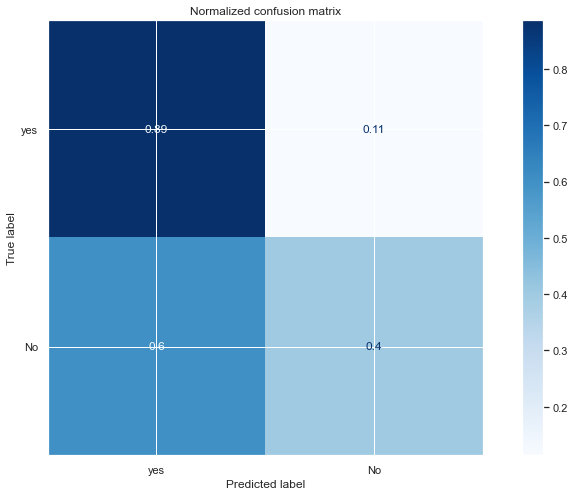

In [284]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [#("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=['yes','No'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Autre approche

[[ go back to the top ]](#Table-of-contents)

***

## Conclusion

[[ go back to the top ]](#Table-of-contents)
***


###  From a Data science point of view

[[ go back to the top ]](#Table-of-contents)
***


###  From a Business point of view

[[ go back to the top ]](#Table-of-contents)
***
